# <font color='green'>Processo Seletivo Oncase </font>

Gabriela Leal | Fevereiro de 2023

## **Macro Tarefa 02: Teste técnico de modelagem - Regressor**
Nessa parte, será necessário implementar um algoritmo de acordo com o paradigma do problema. Cada problema tem um conjunto de métricas que são requeridas. A variável alvo sempre será a coluna de nome “target”, exceto para os problemas não-supervisionados.

3. Construa um regressor e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

  a) métricas: RMSE, R2 e cor(target_observado, target_predito);

  b) dados: regression_data.zip

## 1.1 Leitura e processamento dos arquivos

IMPORTANTE: Precisa carregar os arquivos 'regression_train.csv' e 'regression_test.csv' na raiz do projeto

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Inserindo os arquivos csv de treino e teste para leitura e salvando em variáveis
train_data = pd.read_csv('regression_train.csv')
test_data = pd.read_csv('regression_test.csv')

In [ ]:
# Verificando se o arquivo treino foi inserido corretamente
train_data.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [ ]:
# Verificando se o arquivo teste foi inserido corretamente
test_data.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,3.436244,0.210854,-2.451307,51.239996,4.641751,-67.874319,5,-5.760571
1,1525.839412,2.157483,4.337776,43.828794,8.070219,-68.405526,8,10.193773
2,455.600191,5.166359,-0.452615,43.931305,1.349625,-66.240021,0,-1.063645
3,0.619759,3.276641,-3.607201,50.631046,2.473542,-69.971690,8,-8.476921
4,10.996472,-1.867485,-2.408863,58.660224,2.826219,-53.647149,5,-5.660827


## 1.2 Exibindo informações iniciais dos dados

In [ ]:
print(f"O dataset de treino tem {train_data.shape[0]} linhas e {train_data.shape[1]} colunas")
print(f"O dataset de teste tem {test_data.shape[0]} linhas e {test_data.shape[1]} colunas")

O dataset de treino tem 1042 linhas e 8 colunas
O dataset de teste tem 261 linhas e 8 colunas


In [ ]:
print("Lista dos tipos de dados do dataset de treino:")
train_data.info()

Lista dos tipos de dados do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [ ]:
print("Lista dos tipos de dados do dataset de teste:")
test_data.info()

Lista dos tipos de dados do dataset de teste:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


## 1.3 Tranformação e Limpeza dos dados de treinamento

### **1.3.1 Identificando dados duplicados**

In [ ]:
print(f"Quantidade de dados duplicados no dataset de treino: {train_data.duplicated().sum()}")

Quantidade de dados duplicados no dataset de treino: 0


Obs.: Caso existissem dados duplicados no dataset, ele deveriam ser retirados para não comprometer a modelagem.

### **1.3.2 Identificando dados faltantes**

In [ ]:
print("Quantidade de dados faltantes no dataset de treino:")
train_data.isna().sum()

Quantidade de dados faltantes no dataset de treino:


target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

Obs.: Como existem dados faltantes no dataset, faz-se necessário adotar alguma destas opções: (1) eliminar todos os registros com dados faltantes; (2) alterar os valores 'NaN' por valores substitutos. 

Nessa caso, optou-se por substituir os dados faltantes de X2 pela mediana desta coluna. Também optou-se pela eliminação dos dados da coluna target, já que eles correspondem a uma quantidade significativa da base de treino e a sua substituição poderia levar a um enviesamento do modelo.

In [ ]:
# Verificando quais registros apresentam valores nulos na coluna X2
train_data[train_data.X2.isnull()]

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
172,NaN,4.571493,NaN,45.449257,0.608466,-66.865018,0,2.281620
194,NaN,3.575587,NaN,500.000000,1.861361,-67.123039,0,4.654074
219,NaN,5.868238,NaN,49.194034,8.548749,-61.403013,0,-8.775597
365,NaN,7.590128,NaN,52.673362,1.392632,-66.018883,0,4.254769
384,NaN,7.793605,NaN,49.973915,3.139262,-63.849365,0,14.839001
568,NaN,5.278143,NaN,500.000000,5.705859,-67.186904,0,-5.690331
593,NaN,0.119675,NaN,500.000000,1.479757,-63.551007,0,9.916662
830,NaN,4.278546,NaN,52.395178,7.874239,-62.721191,0,9.959998
956,NaN,4.541186,NaN,500.000000,0.726459,-64.684597,0,4.143541


Obs.: Como todas as linhas que apresentam 'NaN' na coluna X2 apresentam também 'NaN' na coluna target, foi feita a eliminação destes registros uma única vez, usando o comando drop() para a coluna target.

In [ ]:
# Eliminando dados faltantes
train_data.drop(train_data.loc[train_data.target.isnull()].index, axis=0, inplace=True)

In [ ]:
# Verificando o tamanho do dataset de treino após remoção dos dados faltantes
train_data.shape

(715, 8)

### **1.3.3 Identificando valores númericos**

In [ ]:
print("Tipos de dados do dataset de treino:")
train_data.dtypes

Tipos de dados do dataset de treino:


target    float64
X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6          int64
X7        float64
dtype: object

Obs.: A implementação atual da biblioteca sklearn só oferece suporte a dados numéricos, por isso é muito importante verificar o tipo do dado presente no dataset. Caso existissem dados não numéricos, seria necessário utlizar alguma tecnica de codificação de variáveis categoricas como One-hot encoding e Ordinal encoding, por exemplo.

### **1.3.4 Identificando outliers**

In [ ]:
print("Dados estatísticos básicos do dataset de treino:")
train_data.describe()

Dados estatísticos básicos do dataset de treino:


,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,3.367040,1.541895,50.089566,2.330196,-64.986930,4.576224,3.623453
std,1593.201095,2.830287,3.236113,4.067153,2.498788,9.524299,3.237256,7.604867
min,0.062551,-4.079909,-3.786653,38.035456,0.009815,-121.450423,0.000000,-8.898633
25%,230.632308,1.510589,-0.973832,47.423904,0.597640,-69.085396,0.000000,-2.288504
50%,808.374368,3.354627,1.056399,50.137764,1.526100,-65.078252,5.000000,2.482539
75%,1849.754221,5.127394,3.448100,52.871490,3.143906,-61.117380,8.000000,8.103036
max,10382.469480,12.380693,12.926106,62.972372,18.813009,53.919202,8.000000,30.376348


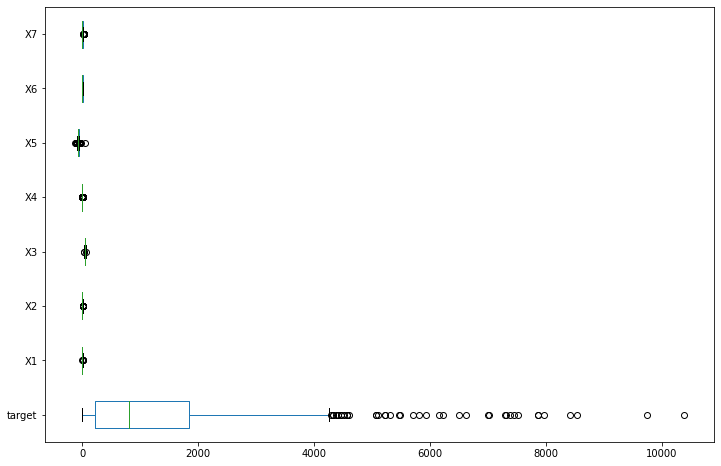

In [ ]:
# Plotando boxplot para observar a distribuição dos dados
train_data.boxplot(figsize=(12,8), grid=False, vert=False)

Obs.: Como os valores apresentados como outliers no boxplot apareceram em maior quantidade na coluna 'target', optou-se por aplicar o metodo amplitude interquartil apenas nesta coluna.

Método Amplitude interquartil

In [ ]:
# Analisando a amplitude interquartil para a coluna target
q1, q3 = np.percentile(train_data.target, [25 , 75])
Amp_interquartil = q3 - q1

print("Primeiro Quartil da coluna target:", q1)
print("Terciro Quartil da coluna target:", q3)
print("Amplitude interquatil para a coluna target:", Amp_interquartil, "\n")

# Determinando o limite inferior e superior para a coluna target
limite_inferior = q1 - (1.5 * Amp_interquartil)
limite_superior = q3 + (1.5 * Amp_interquartil)

print("Limite Inferior da coluna target: ", limite_inferior)
print("Limite Superior da coluna target: ", limite_superior)

Primeiro Quartil da coluna target: 230.63230797379947
Terciro Quartil da coluna target: 1849.7542212374526
Amplitude interquatil para a coluna target: 1619.1219132636531 

Limite Inferior da coluna target:  -2198.05056192168
Limite Superior da coluna target:  4278.437091132932


In [ ]:
# Verificando se existem dados fora dos limites encontrados da coluna target
outliers = len(train_data[(train_data.target < limite_inferior) | (train_data.target > limite_superior)])
print(f"Número de outliers da variável x1: {outliers}")

Número de outliers da variável x1: 41


## 1.4 Observando a distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabb9885af0>,
      dtype=object)

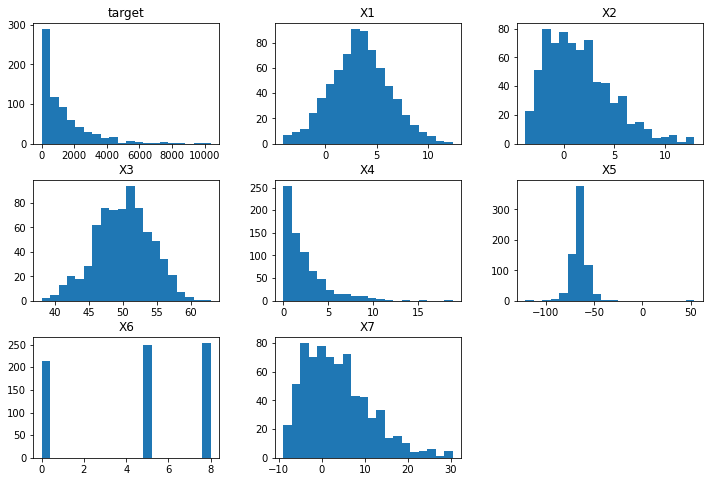

In [ ]:
# Plotando histograma para observar a distribuição dos dados
train_data.hist(figsize=(12,8), bins=20, grid=False)

Identificando como as variáveis se relacionam através da matriz de correlação

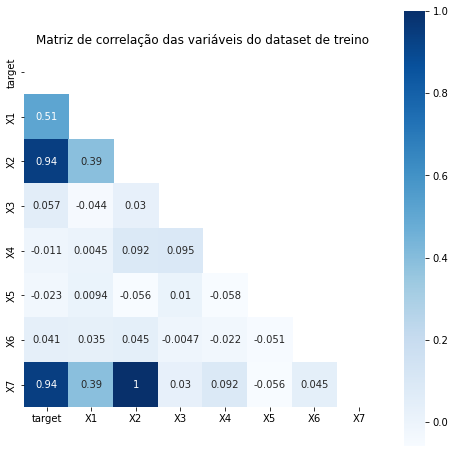

In [ ]:
# Gráfico de correlação entre as colunas do dataset de treino
colunas = ['target', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
corrmat = train_data[colunas].corr()

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
sns.heatmap(corrmat, mask=mask, cmap='Blues',square=True, annot=True)
plt.title("Matriz de correlação das variáveis do dataset de treino")
plt.show()

Obs.: A maioria das correlações são positivas, ou seja, as variáveis se movem na mesma direção. As colunas que apresentam maior grau de correlação são X2 e X7, o que indica que elas possuem um relacionamento linear forte entre si.

Text(0.5, 1.0, 'Scatter: X7 e target')

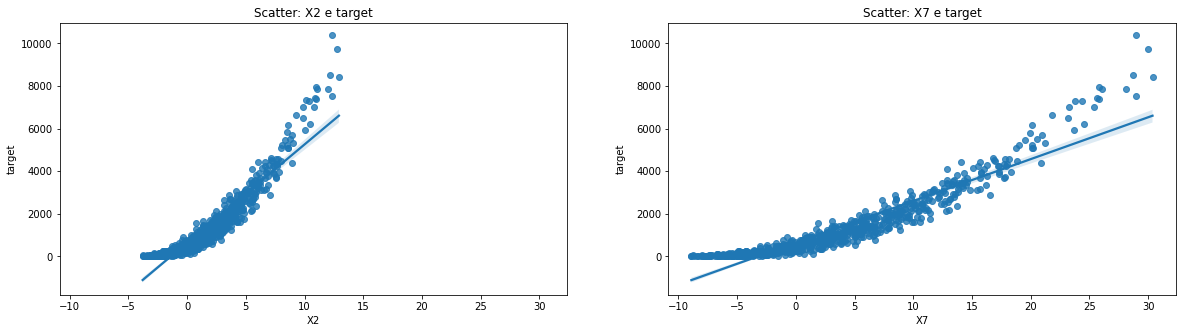

In [ ]:
# Plotando scatter para uma melhor visualização da correlação entre as colunas X2, X7 e target

a, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
sns.regplot(x="X2", y="target", data=train_data, ax=ax[0]).set_title("Scatter: X2 e target")
sns.regplot(x="X7", y="target", data=train_data, ax=ax[1]).set_title("Scatter: X7 e target")

<font color='green'>**CONCLUSÕES IMPORTANTES:**</font>

*   As colunas do dataset de treino não seguem uma distribuição normal;
*   Foi comprovado pelo método amplitude interquartil e pela plotagem do boxplot que existem outliers no dataset de treino, porém optou-se por não remove-los.


## 2. Modelo de Machine Learning

### 2.1 Escolha do algoritmo

* **LinerarRegression:** De simples implementação e menor complexidade em relação a outros algoritmos. Ele é um metodo clássico, consolidado e eficiente computacionalmente.

* **DecisionTreeRegressor:** Apresenta uma estrutura visual similar a de um fluxograma, com etapas muito faceis de visualizar e entender. Comparado com outros algorismos de regressão, ele exige um esforço menor de preparação dos dados durante o pré processamento, sem precisar fazer normalização, criação de variáveis fictícias e remoção de valores em branco.




### 2.2 Métricas de avaliação do modelo

*   **R2 Score**: Expressa quanto da variação dos dados de saída (variável dependente) é explicada pela variável de entrada (independente). Quanto maior o valor de R2, melhor o modelo se ajusta a amostra.

*   **MAE**: É a métrica de erro todos os erros absolutos de previsão,seria a distância vertical entre o valor previsto (valores na linha de regressão) e o valor real.

*   **MSE**: Similar ao MAE, mas eleva o resíduo ao quadrado. O efeito do termo quadrado na equação MSE é mais aparente com a presença de outliers nos dados.

*   **RMSE**: Representa o desvio-padrão amostral das diferenças entre os valores preditos e os reais. Toma o quadrado dos resíduos e depois toma a média deles, o que significa que atribui mais peso a erros de previsão maiores, ou seja, considera mais peso para erros maiores, isso significa que ele penaliza erros maiores mais do que o MAE.


### 2.3 Divisão da base de dados

In [ ]:
# Importando biblioteca para o modelo
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn.metrics as metrics

In [ ]:
# Definindo os atributos que serão utilizadas no modelo
variaveis = ['X2','X7']

# Separando atributos e target
y = train_data['target']
X = train_data[variaveis]

# Definindo o percentual do conjunto de validação
tamanho_val = 0.3

### 2.4 Treinamento dos modelos

#### 2.4.1 Linear Regression

In [ ]:
# Divisão do conjunto de treino e valiadação
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
y_predict_val_regressor = regressor.predict(X_val)

In [ ]:
print(f"Métricas de avaliação do modelo Lenear Regression:")
print(f"R2 Score: {r2_score(y_val, y_predict_val_regressor)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_predict_val_regressor))}")

print(f"MAE: {mean_absolute_error(y_val, y_predict_val_regressor)}")
print(f"MSE: {mean_squared_error(y_val, y_predict_val_regressor)}")

Métricas de avaliação do modelo Lenear Regression:
R2 Score: 0.8695344240192545
RMSE: 649.6357631635041
MAE: 429.85432464557607
MSE: 422026.6247810283


#### 2.4.2 Decision Tree Regression

In [ ]:
# Divisão do conjunto de treino e valiadação
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

tree = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

y_predict_val_tree = tree.predict(X_val)

In [ ]:
print(f"Métricas de avaliação do modelo Decision Tree Regressor:")
print(f"R2 Score: {r2_score(y_val, y_predict_val_tree)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_predict_val_tree))}")

print(f"MAE: {mean_absolute_error(y_val, y_predict_val_tree)}")
print(f"MSE: {mean_squared_error(y_val, y_predict_val_tree)}")

Métricas de avaliação do modelo Decision Tree Regressor:
R2 Score: 0.8869510606195227
RMSE: 604.7212128878106
MAE: 414.9371345507611
MSE: 365687.74531650473
